In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import subprocess
#import argparse
import random
import gzip
import sys
import os


In [8]:
chr_names = pd.read_csv("../chr_names.txt", sep ="\t", header =None)
chr_names

0            1
0   LG01  NC_025968.3
1   LG02  NC_025969.3
2   LG03  NC_025970.3
3   LG04  NC_025971.3
4   LG05  NC_025972.3
5   LG06  NC_025973.3
6   LG07  NC_025974.3
7   LG08  NC_025975.3
8   LG09  NC_025976.3
9   LG10  NC_025977.3
10  LG11  NC_025978.3
11  LG12  NC_025979.3
12  LG13  NC_025980.3
13  LG14  NC_025981.3
14  LG15  NC_025982.3
15  LG16  NC_025983.3
16  LG17  NC_025984.3
17  LG18  NC_025985.3
18  LG19  NC_025986.3
19  LG20  NC_025987.3
20  LG21  NC_025988.3
21  LG22  NC_025989.3
22  LG23  NC_025990.3
23  LG24  NC_025991.3
24  LG25  NC_025992.3

In [3]:
cds = pd.read_csv("all_CDS_e.lucius.bed", sep="\t", header=None)
cds.columns = ["chr","start","stop","length"]
cds

chr     start      stop  length
0       NC_025968.3     25025     25109      84
1       NC_025968.3     43238     43405     167
2       NC_025968.3     63370     63464      94
3       NC_025968.3     68134     68296     162
4       NC_025968.3     71011     71192     181
5       NC_025968.3     73042     73095      53
6       NC_025968.3     83756     83929     173
7       NC_025968.3     87214     87357     143
8       NC_025968.3     91960     92067     107
9       NC_025968.3    102644    102685      41
10      NC_025968.3    105743    105856     113
11      NC_025968.3    111405    111628     223
12      NC_025968.3    112857    112975     118
13      NC_025968.3    113498    113715     217
14      NC_025968.3    129505    129730     225
15      NC_025968.3    137987    138276     289
16      NC_025968.3     25025     25109      84
17      NC_025968.3     43238     43405     167
18      NC_025968.3     63370     63464      94
19      NC_025968.3     68134     68296     162
20      NC_025968.3     71011     71192     181
21      NC_025968.3     73042     73095      53
22      NC_025968.3     83756     83929     173
23      NC_025968.3     87214     87357     143
24      NC_025968.3     91960     92067     107
25      NC_025968.3    102644    102685      41
26      NC_025968.3    105743    105856     113
27      NC_025968.3    109664    109867     203
28      NC_025968.3    111405    111628     223
29      NC_025968.3    112857    112975     118
...             ...       ...       ...     ...
436504  NC_025992.3  19568785  19568981     196
436505  NC_025992.3  19571059  19571298     239
436506  NC_025992.3  19579236  19579400     164
436507  NC_025992.3  19583788  19583815      27
436508  NC_025992.3  19552124  19552159      35
436509  NC_025992.3  19552635  19552749     114
436510  NC_025992.3  19557986  19558233     247
436511  NC_025992.3  19560454  19560652     198
436512  NC_025992.3  19561822  19562189     367
436513  NC_025992.3  19562528  19562734     206
436514  NC_025992.3  19563415  19563522     107
436515  NC_025992.3  19563751  19563855     104
436516  NC_025992.3  19563992  19564159     167
436517  NC_025992.3  19564319  19564477     158
436518  NC_025992.3  19565473  19565526      53
436519  NC_025992.3  19568785  19568981     196
436520  NC_025992.3  19571059  19571298     239
436521  NC_025992.3  19579236  19579376     140
436522  NC_025992.3  19594281  19594410     129
436523  NC_025992.3  19605881  19606177     296
436524  NC_025992.3  19611056  19611211     155
436525  NC_025992.3  19612576  19612724     148
436526  NC_025992.3  19618491  19618643     152
436527  NC_025992.3  19618812  19618949     137
436528  NC_025992.3  19619406  19619488      82
436529  NC_025992.3  19619607  19619833     226
436530  NC_025992.3  19628598  19628665      67
436531  NC_025992.3  19644117  19644223     106
436532  NC_025992.3  19648328  19648435     107
436533  NC_025992.3  19652172  19652200      28

[436534 rows x 4 columns]

(-100, 2000)

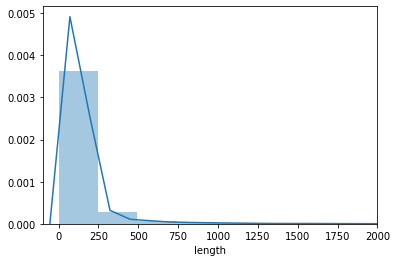

In [19]:
sns.distplot(cds["length"]).set_xlim(-100,2000)

In [19]:
#select 3 CDS with 600 bp
my_cds = cds[(cds["length"]>=5000) & (cds["chr"] != "NC_025991.3")]   #exclude sex chromosome LG24 = NC_025991.3
my_cds = random.sample(list(my_cds.values),20)
my_cds = ["%s:%s-%s"%(i[0],i[1],i[2]) for i in my_cds]

my_cds
#f = open('my_cds.txt','w')
#f.write("\n".join(my_cds))
#f.close()

In [7]:
my_cds

['NC_025984.3:8315862-8322383',
 'NC_025982.3:10476718-10484031',
 'NC_025992.3:11618344-11623381']

In [2]:
pops = ["flaviae_names.txt", "lucius_names.txt"]
pops_short = ["it","eur"]

In [8]:
pops = ["flaviae_names.txt", "lucius_names.txt"]
pops_short = ["it","eur"]

index = 1
for i,cds in enumerate(my_cds):
    i += 4
    !mkdir cds$i

    for pop,j in zip(pops,pops_short):
        for ind in open(pop, "r"):
            cmd = ("samtools faidx GCF_000721915.3_Eluc_V3_genomic.fa %s | bcftools consensus -I -s %s pike_nohyb_minDP8_maf0.5_geno0.1_biallelicsnponly.vcf.gz -o cds%s/%s_%s_cds%s.fa"%(cds, ind, i, j, ind, i))
            try:
                subprocess.run(cmd, shell=True, check=True)
            except:
                sys.exit('\n\n!! samtools or bcftools did not exit cleanly. Check output\n\n')
                ! echo $?

%tb

SystemExit: 

!! samtools or bcftools did not exit cleanly. Check output



/home/ilardob/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3304: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [43]:
pwd

'/home/ilardob/Documents/luccio/selection/paml'

In [ ]:
pops = ["flaviae_names.txt", "lucius_names.txt"]
pops_short = ["it","eur"]

index = 1
for i,cds in enumerate(my_cds):
    i += 4
    !mkdir cds$i
    for pop,j in zip(pops,pops_short):
        for ind in open(pop, "r"):
            !samtools faidx GCF_000721915.3_Eluc_V3_genomic.fa $cds | bcftools consensus -I -s $ind pike_nohyb_minDP8_maf0.5_geno0.1_biallelicsnponly.vcf.gz -o cds${i}/${j}_${ind::8}_cds${i}.fa
            #!echo $?

%tb

In [39]:
%tb

SystemExit: 

!! samtools or bcftools did not exit cleanly. Check output



def get_cds_fastas(pop,file, max_pos=max_pos, bin_size=bin_size, chr=chr): #this is NOT just the terminal command! it actually launches it.
    #pop can be either "italian" or "european"
    file = file.split(".sites")[0]
    if pop == "it": species = "italian"
    if pop == "eur": species = "european"
    out = "%s_%s:%s-%s"%(pop,chr,max_pos,(max_pos+(bin_size)))
    cmd = ("plink2 --bfile %s --aec --keep-fam ../%sfid  --freq refbins=0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1 --chr %s --from-bp %s --to-bp %s --out %s"%(file,species,chr,max_pos,(max_pos+(bin_size)),out))
    #filename = "%s.afreq.ref.bins"%(file) # adds the final part of the output name, added by plink2.0    
    try:
        subprocess.run(cmd, shell=True, check=True)
    except:
        sys.exit('\n\n!! PLINK did not exit cleanly. Check output\n\n')
        
    return out

In [29]:
counter = 0
with open("cds1/it_cds1.aln", "r") as it:
    with open("cds1/eur_cds1.aln", "r") as eur:
        for line1, line2 in zip(it,eur):
            if "NC_" in line1 and "NC_" in line2:
                counter += 1
                if counter == 10000: break
                line1 = line1.strip().split()[1]
                line2 = line2.strip().split()[1]

                if line1 == line2: print("OK")

OK
OK
OK
OK
OK
OK


In [49]:
counter = 0
with open("cds1/it_cds1.aln", "r") as it:
    with open("cds1/eur_cds1.aln", "r") as eur:

        for [i,line1],[j,line2] in zip(enumerate(it),enumerate(eur)):

            if (i == 0 or i % 18 == 0) and (j == 0 or j % 8 == 0):
                    print("it\t",line1,"\neur\t",line2,"\n\n")

                
            #print("it\t",line1,"\neur\t",line2,"\n\n")

it	 CLUSTAL 2.1 multiple sequence alignment
 
eur	 CLUSTAL 2.1 multiple sequence alignment
 


it	 NC_025968.3_12294702-12295302i      GCGCTTCCAGCCCTTTGGGAGCAAGACCCCCACCCTCTCCGGATCGGTGG
 
eur	 NC_025968.3_12294702-12295302e      CTCTCCGAAGAAAGGAGGAAGAGGAAAAAAAAGAAGAGAGATAAAGACAG
 




In [48]:
with open("cds1/it_cds1.aln", "r") as it:
    with open("cds1/eur_cds1.aln", "r") as eur:
        for [i,line1],[j,line2] in zip(enumerate(it),enumerate(eur)):
            print(line1,line2)

CLUSTAL 2.1 multiple sequence alignment
 CLUSTAL 2.1 multiple sequence alignment


 


 

NC_025968.3_12294702-12295302i      CCACTGCCAAACCCCCAACACCATGGTGTGTGCCCCGGCCTTCAGCGGCC
 NC_025968.3_12294702-12295302e      CCACTGCCAAACCCCCAACACCATGGTGTGTGCCCCGGCCTTCAGCGGCC

NC_025968.3_12294702-12295302i      CCACTGCCAAACCCCCAACACCATGGTGTGTGCCCCGGCCTTCAGCGGCC
 NC_025968.3_12294702-12295302e      CCACTGCCAAACCCCCAACACCATGGTGTGTGCCCCGGCCTTCAGCGGCC

NC_025968.3_12294702-12295302i      CCACTGCCAAACCCCCAACACCATGGTGTGTGCCCCGGCCTTCAGCGGCC
 NC_025968.3_12294702-12295302e      CCACTGCCAAACCCCCAACACCATGGTGTGTGCCCCGGCCTTCAGCGGCC

NC_025968.3_12294702-12295302i      CCACTGCCAAACCCCCAACACCATGGTGTGTGCCCCGGCCTTCAGCGGCC
 NC_025968.3_12294702-12295302e      CCACTGCCAAACCCCCAACACCATGGTGTGTGCCCCGGCCTTCAGCGGCC

NC_025968.3_12294702-12295302i      CCACTGCCAAACCCCCAACACCATGGTGTGTGCCCCGGCCTTCAGCGGCC
 NC_025968.3_12294702-12295302e      CCACTGCCAAACCCCCAACACCATGGTGTGTGCCCCGGCCTTCAGCGGCC

NC_025968.3_12294702-12295302i